In [ ]:
# K Nearest Neighbour   

"""

1 - Euclidean Distance sqrt((x1 - x2)^2 + (y1 - y2)^2)          => L2 Norm
2 - Manhattan Distance |x1 - x2| + |y1 -y2|                     => L1 Norm
3 - Minkowski Distance (|x1 - x2|^p + |y1 - y2|^p) ^(1/p)       => Lp Norm
4 - Hamming Distance 

"""

"""

1 - K değeri seçilir(Tek sayı)
2 - Eğitim verisi içerisinde her bir noktanın, yeni noktaya olan mesafesi ölçülür.
3 - K adet en yakın komşu bulunur(yeni veri noktasına olan)
4 - her bir sınıftaki veri noktaları sayılarak daha fazla komşuya sahip olunan kategoriyeni sınıf olarak belirlenir  

"""

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [52]:
data = pd.read_csv("../../Data/titanic.csv")
data.head()

,Survived,Age,Fare,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,SibSp_0,SibSp_1,...,Parch_0,Parch_1,Parch_2,Parch_3,Parch_4,Parch_5,Parch_6,Embarked_C,Embarked_Q,Embarked_S
0,0,22.0,7.2500,0,0,1,0,1,0,1,...,1,0,0,0,0,0,0,0,0,1
1,1,38.0,71.2833,1,0,0,1,0,0,1,...,1,0,0,0,0,0,0,1,0,0
2,1,26.0,7.9250,0,0,1,1,0,1,0,...,1,0,0,0,0,0,0,0,0,1
3,1,35.0,53.1000,1,0,0,1,0,0,1,...,1,0,0,0,0,0,0,0,0,1
4,0,35.0,8.0500,0,0,1,0,1,1,0,...,1,0,0,0,0,0,0,0,0,1


In [5]:
x = data.drop(['Survived'] , axis=1)
y = data["Survived"]

In [6]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()

x_scaled = sc.fit_transform(x)

In [7]:
x = pd.DataFrame(x_scaled , columns=x.columns)
x.head()

,Age,Fare,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,SibSp_0,SibSp_1,SibSp_2,...,Parch_0,Parch_1,Parch_2,Parch_3,Parch_4,Parch_5,Parch_6,Embarked_C,Embarked_Q,Embarked_S
0,0.271174,0.014151,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.472229,0.139136,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.321438,0.015469,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.434531,0.103644,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.434531,0.015713,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [35]:
from sklearn.model_selection import train_test_split
train_x , test_x , train_y , test_y = train_test_split(x , y , random_state = 56 , stratify = y)

In [36]:
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.metrics import f1_score

In [37]:
classifier = KNN(n_neighbors=10, metric='euclidean')
classifier.fit(train_x, train_y)

test_predict = classifier.predict(test_x)
k_1 = f1_score(test_predict , test_y)

In [38]:
def Elbow(K) :
    test_error = []

    for i in K :
        classifier = KNN(n_neighbors = i)
        classifier.fit(train_x , train_y)

        tmp = classifier.predict(test_x)
        tmp = f1_score(tmp , test_y)
        error = 1 - tmp
        test_error.append(error)

    return test_error

In [39]:
k = range(6, 30, 2)

In [40]:
test = Elbow(k)

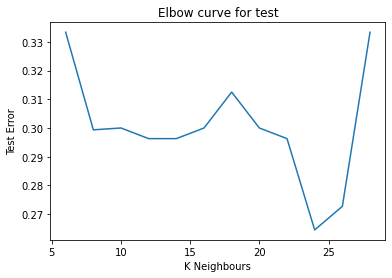

In [41]:
plt.plot(k, test)
plt.xlabel("K Neighbours")
plt.ylabel("Test Error")
plt.title("Elbow curve for test")
plt.show()

In [50]:
classifier = KNN(n_neighbors = 27 , metric = 'euclidean')
classifier.fit(train_x , train_y)

test_predict = classifier.predict(test_x)
k_2 = f1_score(test_predict , test_y)

In [51]:
print("Before Elbow Method KNN Score : " , k_1)
print("After Elbow Method KNN Score : " , k_2)

Before Elbow Method KNN Score :  0.7000000000000001
After Elbow Method KNN Score :  0.7435897435897435
